In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.stats import wilcoxon
from sklearn.manifold import MDS
import seaborn as sns
from scipy.stats import friedmanchisquare, wilcoxon
from itertools import combinations
from matplotlib.lines import Line2D




In [89]:
# FUNCTIONS
# Friedman and posthoc wilcoxon for the indices

def friedman_and_posthoc(datasets, name):
    print('------------------------')
    print(name)
    for regionYear in regionYears:
        print('-------------', regionYear, '-------------------')
        # Example data (related groups)
        if regionYear == 'Gulf':
            # Step 1: Perform Friedman Test
            stat, p = friedmanchisquare(datasets[regionYear][0], datasets[regionYear][1], datasets[regionYear][2], datasets[regionYear][3])
            print(f"Friedman Test: Chi-square statistic = {stat}, p-value = {p}")
        else:
            stat, p = friedmanchisquare(datasets[regionYear][0], datasets[regionYear][1], datasets[regionYear][2])
            print(f"Friedman Test: Chi-square statistic = {stat}, p-value = {p}")  
        if p < 1:
            print("Significant differences found. Proceeding with pairwise comparisons.")
            
            # Step 2: Perform pairwise Wilcoxon Signed-Rank Tests
            data = datasets[regionYear]
            labels = ['CI', 'HI', 'HM']
            if regionYear == 'Gulf':
                labels = ['CI-m', 'CI', 'HI', 'HM']
            comparisons = combinations(range(len(data)), 2)  # Generate pairwise indices
            # print(comparisons)
            for i, j in comparisons:
                plt.plot(data[i], label=labels[i])
                plt.plot(data[j], label=labels[j])
                plt.legend()
                plt.title(f"{labels[i]} vs {labels[j]} in {regionYear}")
                plt.show()
                plt.close()
                print(f"Mean for {labels[i]}: ", np.mean(data[i]), f"Mean for {labels[j]}: ", np.mean(data[j]))
                print(f"Median for {labels[i]}: ", np.median(data[i]), f"Median for {labels[j]}: ", np.median(data[j]))
                stat, p = wilcoxon(data[i], data[j])
                print(f"Wilcoxon Test ({labels[i]} vs {labels[j]}): Statistic = {stat}, p-value = {p}")
        else:
            print("No significant differences found. No need for pairwise comparisons.")
from scipy import stats
import numpy as np


def test_assumptions(dataset):
    for regionYear in regionYears:
        print('-------------------', regionYear, '------------------------')
        for type in range(3):
            print(regionYear, type)
            data = dataset[regionYear][type]    
            # Perform the Shapiro-Wilk test
            statistic, p_value = stats.shapiro(data)
            
            # Print results
            print(f"Shapiro-Wilk Test Statistic: {statistic}")
            print(f"P-value: {p_value}")
        
            # Interpret the result
            if p_value > 0.05:
                print(f"The data is normally distributed (p = {p_value:.3f})")
            else:
                print('NOT NORMAL----------------------------------------')
                print(f"The data is not normally distributed (p = {p_value:.3f})")
        print('###########', 'Levene Time', '################')
        for combo in [[0, 1], [0, 2], [1, 2]]:
            
            # Perform Levene's test for homogeneity of variances
            stat, p_value = stats.levene(dataset[regionYear][combo[0]] , dataset[regionYear][combo[1]])
            # Print the test statistic and p-value
            print(f"Levene's test statistic: {stat}")
            print(f"P-value: {p_value}")


In [124]:
#this is where the relative abundances are imported. Be sure to check the file name for desired computer predictions based on training strategy.
# max_relabunds.xlsx is for predictions with the model that has max_traning_class = unlimited
# relabunds.xlsx is for predictions from max_training_class = 5000
relabund_df = pd.read_excel('five_thousand_strat4_relabunds_feb4.xlsx')
#change names of sorting processes, then sort.
relabund_df = relabund_df.replace('AI', 'CI')
relabund_df = relabund_df.replace('MC', 'HM')
relabund_df = relabund_df.replace('FC', 'HI')
relabund_df = relabund_df.sort_values(by=['newName', 'regionYear', 'type', 'FlowCamID']).reset_index(drop=True)
#change region names
relabund_df = relabund_df.replace({'Gulf 2020': 'Gulf', 'Pac 21': 'Pacific' })
#remove rows where the newName matches any taxa in the taxa_exclusion_list
# relabund_df = relabund_df[~relabund_df['newName'].isin(taxa_exclusion_list)]
regionYears = relabund_df['regionYear'].unique()
regionYears

array(['Gulf', 'NL 2020', 'NL 2021', 'Pacific'], dtype=object)

In [125]:
#this is where the relative abundances are imported. Be sure to check the file name for desired computer predictions based on training strategy.
# max_relabunds.xlsx is for predictions with the model that has max_traning_class = unlimited
# relabunds.xlsx is for predictions from max_training_class = 5000
max_relabund_df = pd.read_excel('max_strat4_relabunds_feb4.xlsx')
#change names of sorting processes, then sort.
max_relabund_df = max_relabund_df.replace('AI', 'CI')
max_relabund_df = max_relabund_df.replace('MC', 'HM')
max_relabund_df = max_relabund_df.replace('FC', 'HI')
max_relabund_df = max_relabund_df.sort_values(by=['newName', 'regionYear', 'type', 'FlowCamID']).reset_index(drop=True)
#change region names
max_relabund_df = max_relabund_df.replace({'Gulf 2020': 'Gulf', 'Pac 21': 'Pacific' })
#remove rows where the newName matches any taxa in the taxa_exclusion_list
# max_relabund_df = max_relabund_df[~max_relabund_df['newName'].isin(taxa_exclusion_list)]

maxRegionYears = max_relabund_df['regionYear'].unique()
maxRegionYears

array(['Gulf', 'NL 2020', 'NL 2021', 'Pacific'], dtype=object)

In [126]:
# add tortanus with zeroes to max_relabund_df in Gulf region
tort_df = relabund_df[(relabund_df['newName'] == 'Tortanus spp.') & (relabund_df['regionYear'] == 'Gulf')].copy()
tort_df['abund'] = 0
tort_df['relabund'] = 0
max_relabund_df = pd.concat([max_relabund_df, tort_df])
max_relabund_df = max_relabund_df.sort_values(by=['newName', 'regionYear', 'type', 'FlowCamID']).reset_index(drop=True)
maxRegionYears = max_relabund_df['regionYear'].unique()
maxRegionYears

array(['Gulf', 'NL 2020', 'NL 2021', 'Pacific'], dtype=object)

In [127]:
#add max gulf to relabund_df
max_gulf = max_relabund_df[max_relabund_df['regionYear'] == 'Gulf'].copy()
max_gulf = max_gulf.replace({'CI': 'CI-u'})
max_gulf = max_gulf[max_gulf['type'] == 'CI-u']
relabund_df = pd.concat([relabund_df, max_gulf])
relabund_df['type'].unique()
relabund_df[relabund_df['type'] == 'CI-u']
relabund_df = relabund_df.reset_index(drop=True)
regionYears = relabund_df['regionYear'].unique()
regionYears

array(['Gulf', 'NL 2020', 'NL 2021', 'Pacific'], dtype=object)

In [128]:
all_taxa = set(relabund_df['newName'].unique())
for regionYear in regionYears:
    regiondf = relabund_df[relabund_df['FlowCamID'] == regionYear]
    samples = regiondf['FlowCamID'].unique()
    for sample in samples:
        sampledf = regiondf[regiondf['FlowCamID'] == sample].copy()
        sample_taxa = set(sampledf['newName'].unique())
        missing_taxa = all_taxa - sample_taxa
        # print(missing_taxa)
        for missing_taxon in missing_taxa:
            # print('adding: ', missing_taxon)
            relabund_df.loc[len(relabund_df)] = {'newName': missing_taxon, 'FlowCamID': sample, 'regionYear': regionYear, 'relabund': 0}
relabund_df = relabund_df.sort_values(['FlowCamID', 'newName'])
relabund_df

,Unnamed: 0,newName,FlowCamID,type,regionYear,abund,sumabund,relabund
60,0,Acartia spp.,21_10_05_NL_S1_Z17_0752_250,CI,NL 2021,276.000000,788.000000,0.350254
70,1,Acartia spp.,21_10_05_NL_S1_Z17_0752_250,HI,NL 2021,295.389927,737.310046,0.400632
80,2,Acartia spp.,21_10_05_NL_S1_Z17_0752_250,HM,NL 2021,840.225611,2086.077379,0.402778
150,122,Aglantha spp. (medusa),21_10_05_NL_S1_Z17_0752_250,CI,NL 2021,0.000000,788.000000,0.000000
160,120,Aglantha spp. (medusa),21_10_05_NL_S1_Z17_0752_250,HI,NL 2021,1.500069,737.310046,0.002035
...,...,...,...,...,...,...,...,...
4039,4048,Siphonophorae (nectophore),AMMP_PA_S04W20_20210610LT_250um,HI,Pacific,16.382383,5119.332274,0.003200
4049,4049,Siphonophorae (nectophore),AMMP_PA_S04W20_20210610LT_250um,HM,Pacific,26.307239,4731.813226,0.005560
4239,4257,Tortanus spp.,AMMP_PA_S04W20_20210610LT_250um,CI,Pacific,6.000000,975.000000,0.006154
4249,4258,Tortanus spp.,AMMP_PA_S04W20_20210610LT_250um,HI,Pacific,19.966048,5119.332274,0.003900


In [129]:
samples = relabund_df['FlowCamID'].unique()
for sample in samples:
    sampledf = relabund_df[relabund_df['FlowCamID'] == sample]
    types = sampledf['type'].unique()
    # for type in types:
    #     print(len(sampledf[sampledf['type'] == type]['newName'].unique()))

In [131]:
regionYears = relabund_df['regionYear'].unique()
dissim_dict = {}
print(regionYears)
for regionYear in regionYears:
    dissim_dict[regionYear] = []
    region_df = relabund_df[relabund_df['regionYear'] == regionYear]
    region_taxa = region_df['newName'].unique()
    samples = region_df['FlowCamID'].unique()
    samples.sort()
    types = region_df['type'].unique()
    print(types)
    if len(types) > 3:
        types = ['CI-u', 'CI', 'HI', 'HM']
    for type in types:
        pivot_dict = {}
        type_df = region_df[region_df['type'] == type]
        for taxa in region_taxa:
            taxa_relabunds = type_df[type_df['newName'] == taxa].sort_values('FlowCamID')['relabund'].to_numpy()
            pivot_dict[taxa] = taxa_relabunds
        data = pd.DataFrame(pivot_dict, index=samples)
        bray_curtis_dissimilarity = pdist(data, metric='braycurtis')
        dissim_dict[regionYear].append(bray_curtis_dissimilarity)
    # Create the example data
print(dissim_dict)

['NL 2021' 'Gulf' 'NL 2020' 'Pacific']
['CI' 'HI' 'HM']
['CI' 'HI' 'HM' 'CI-u']
['CI' 'HI' 'HM']
['CI' 'HI' 'HM']
{'NL 2021': [array([0.13609533, 0.20221905, 0.167503  , 0.08525884, 0.17461321,
       0.24985965, 0.19915609, 0.1343868 , 0.24466737, 0.16895702,
       0.16000479, 0.1617838 , 0.17160775, 0.20345199, 0.22005734,
       0.19064177, 0.18013616, 0.07920116, 0.21485735, 0.19158965,
       0.13281784, 0.13232057, 0.15219211, 0.21219625, 0.19746207,
       0.21646052, 0.16039329, 0.1165299 , 0.1635426 , 0.23467676,
       0.16400787, 0.26792779, 0.18950472, 0.14176962, 0.24603685,
       0.15685149, 0.1440707 , 0.10681297, 0.10815768, 0.17370392,
       0.1916474 , 0.14392528, 0.11979241, 0.1928584 , 0.17161584]), array([0.14250763, 0.26375744, 0.20412844, 0.1228581 , 0.25816078,
       0.26760185, 0.21662157, 0.26376635, 0.27073722, 0.21918933,
       0.18865574, 0.17239266, 0.22128448, 0.19832943, 0.18831202,
       0.27681393, 0.20098099, 0.11519589, 0.29725471, 0.2744246 ,


['CI' 'HI' 'HM']
['CI' 'HI' 'HM' 'CI-u']
['CI' 'HI' 'HM']
['CI' 'HI' 'HM']
0
[1, 0.25]
1
[2, 0.6]
2
[3, 0.65]
3
[1, 0.35]
4
[1, 0.3]
5
[2, 0.38]
6
[3, 0.45]


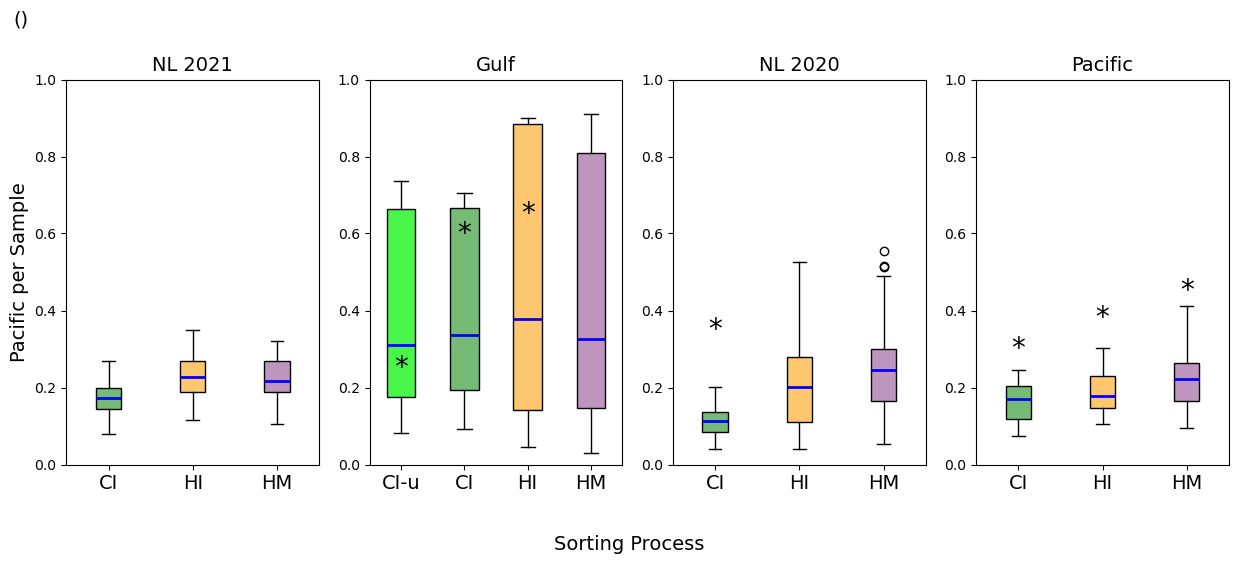

In [132]:
def display_boxplots(data, ylim, asterisk_indices, asterisk_locs, title, figuretitle):
    # print(data)
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))
    for r, regionYear in enumerate(regionYears):
        types = relabund_df[relabund_df['regionYear'] == regionYear]['type'].unique()
        print(types)
        
        ax = axes[r]
        bplot = ax.boxplot(data[regionYear], patch_artist=True, medianprops=dict(color='blue', linewidth=2))
        # Set x-ticks labels for each boxplot
        colors = ['#75ba75', '#fec76f', '#be95be']
        if len(types) > 3:
            types = list(types)
            types = [types[3]] + types[:3]
            colors = ['#49f549', '#75ba75', '#fec76f', '#be95be']
        ax.set_xticks(range(1, len(types) + 1), types, fontsize=14)
        
        # Add title and labels
        ax.set_title(regionYear, fontsize=14)
        ax.set_ylim(ylim)
        
    # fill with colors
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)
        # ax.set_xlabel('Classification Method')
        # ax.set_ylabel('Number of Unique Taxa per Sample')
    
    # Set a single y-label on the left side for all subplots
    axes[0].set_ylabel(f"{title} per Sample", fontsize=14)
    for i, index in enumerate(asterisk_indices):
        print(i)
        print(asterisk_locs[i])
        axes[index].text(asterisk_locs[i][0], asterisk_locs[i][1], '*', fontsize=20, color='black', ha='center', va='center')
    
    # Set a single x-label at the bottom in the center for all subplots
    fig.text(0.5, -0.05, "Sorting Process", ha='center', va='center', fontsize=14)
    fig.text(0.1, 1, f"({figuretitle})", ha='right', va='center', fontsize=14)  
    # Show the plot
    plt.show()
    plt.close()
display_boxplots(dissim_dict, [0, 1], [1, 1, 1, 2, 3, 3, 3], [[1, 0.25], [2, 0.6], [3, 0.65], [1, 0.35], [1, 0.3], [2, 0.38], [3, 0.45]], regionYear, '')

In [133]:
dissim_dict.keys()

dict_keys(['NL 2021', 'Gulf', 'NL 2020', 'Pacific'])

In [134]:
test_assumptions(dissim_dict)

------------------- NL 2021 ------------------------
NL 2021 0
Shapiro-Wilk Test Statistic: 0.9907861803509644
P-value: 0.9742500556042725
The data is normally distributed (p = 0.974)
NL 2021 1
Shapiro-Wilk Test Statistic: 0.9761368302157002
P-value: 0.47227547133913605
The data is normally distributed (p = 0.472)
NL 2021 2
Shapiro-Wilk Test Statistic: 0.9745418846516223
P-value: 0.4181339676084719
The data is normally distributed (p = 0.418)
########### Levene Time ################
Levene's test statistic: 3.8573837359722565
P-value: 0.052683773613005164
Levene's test statistic: 3.536263666009068
P-value: 0.06334823691386202
Levene's test statistic: 0.05259171815118469
P-value: 0.8191455019007422
------------------- Gulf ------------------------
Gulf 0
Shapiro-Wilk Test Statistic: 0.841530973185729
P-value: 2.232920132673944e-05
NOT NORMAL----------------------------------------
The data is not normally distributed (p = 0.000)
Gulf 1
Shapiro-Wilk Test Statistic: 0.8469956403889458
P-v

------------------------
Dissimilarity
------------- Gulf -------------------
Friedman Test: Chi-square statistic = 6.413333333333412, p-value = 0.09314380541625977
Significant differences found. Proceeding with pairwise comparisons.


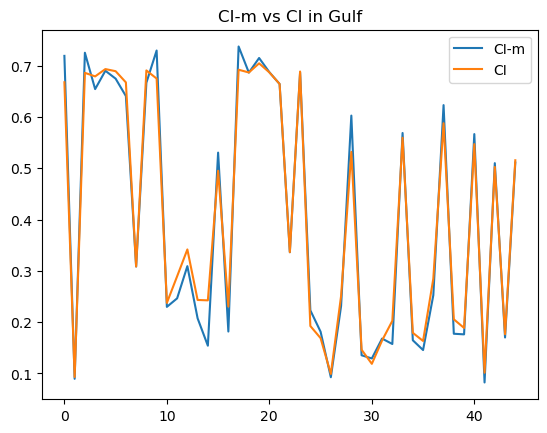

Mean for CI-m:  0.4030532308983927 Mean for CI:  0.40606284430758677
Median for CI-m:  0.30915474055187686 Median for CI:  0.3362969859706137
Wilcoxon Test (CI-m vs CI): Statistic = 427.0, p-value = 0.3128923815459643


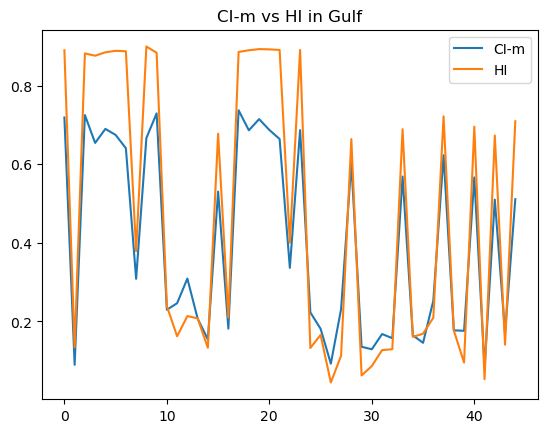

Mean for CI-m:  0.4030532308983927 Mean for HI:  0.4713050924934856
Median for CI-m:  0.30915474055187686 Median for HI:  0.3788386468207295
Wilcoxon Test (CI-m vs HI): Statistic = 235.0, p-value = 0.0010781438645039998


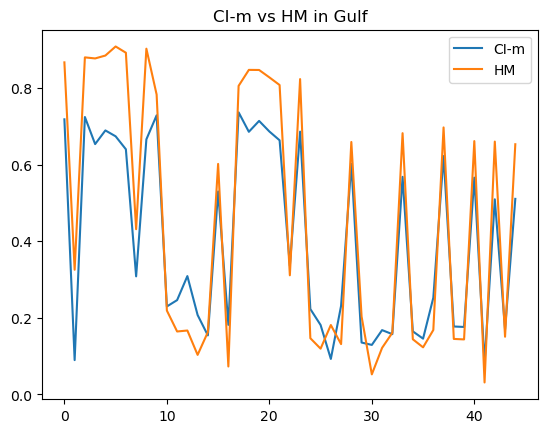

Mean for CI-m:  0.4030532308983927 Mean for HM:  0.4569959692227773
Median for CI-m:  0.30915474055187686 Median for HM:  0.325736961451248
Wilcoxon Test (CI-m vs HM): Statistic = 270.0, p-value = 0.004556986892794157


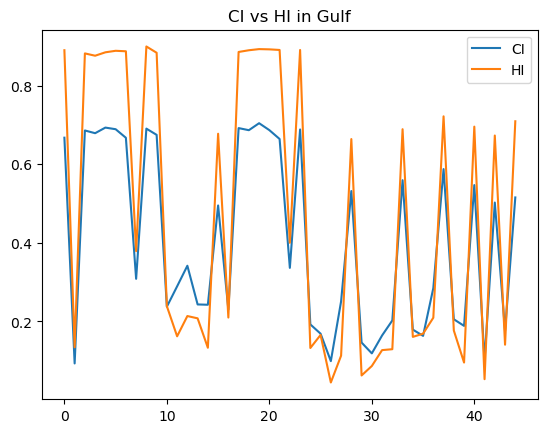

Mean for CI:  0.40606284430758677 Mean for HI:  0.4713050924934856
Median for CI:  0.3362969859706137 Median for HI:  0.3788386468207295
Wilcoxon Test (CI vs HI): Statistic = 257.0, p-value = 0.002736544115293782


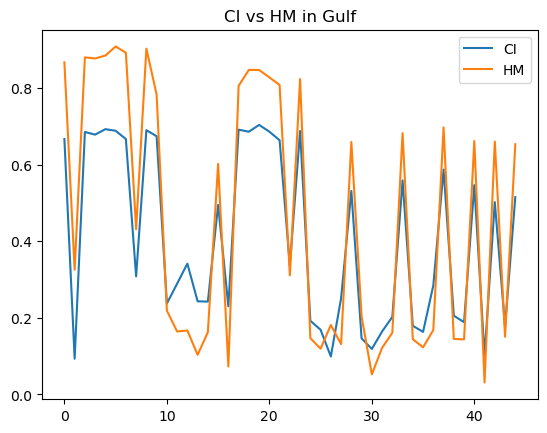

Mean for CI:  0.40606284430758677 Mean for HM:  0.4569959692227773
Median for CI:  0.3362969859706137 Median for HM:  0.325736961451248
Wilcoxon Test (CI vs HM): Statistic = 281.0, p-value = 0.006862312871078302


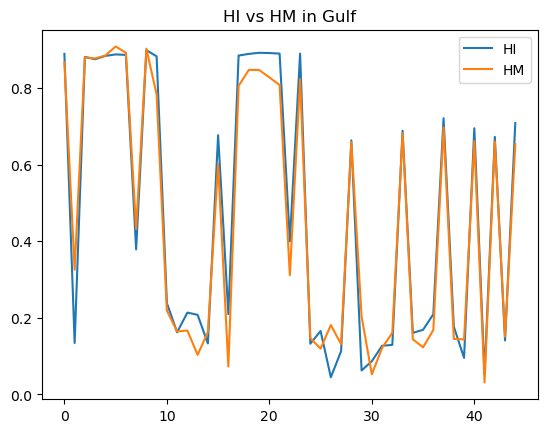

Mean for HI:  0.4713050924934856 Mean for HM:  0.4569959692227773
Median for HI:  0.3788386468207295 Median for HM:  0.325736961451248
Wilcoxon Test (HI vs HM): Statistic = 308.0, p-value = 0.01728535203113779
------------- NL 2020 -------------------
Friedman Test: Chi-square statistic = 44.933333333333394, p-value = 1.749244994755497e-10
Significant differences found. Proceeding with pairwise comparisons.


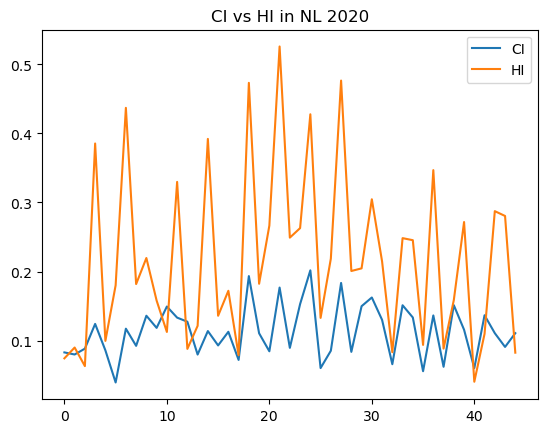

Mean for CI:  0.1130279028404463 Mean for HI:  0.2176592020231874
Median for CI:  0.11265472090962726 Median for HI:  0.20071949688248383
Wilcoxon Test (CI vs HI): Statistic = 65.0, p-value = 9.969596703740535e-09


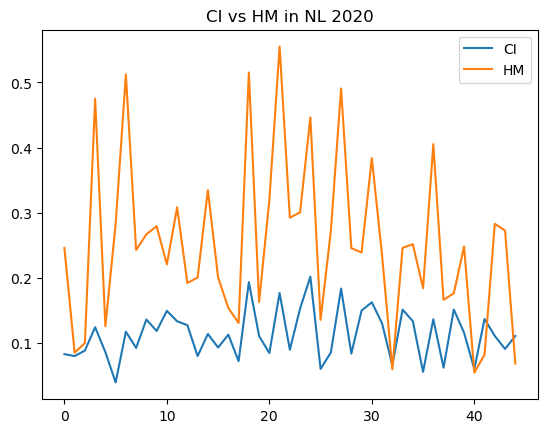

Mean for CI:  0.1130279028404463 Mean for HM:  0.2542873474499204
Median for CI:  0.11265472090962726 Median for HM:  0.24573744682276544
Wilcoxon Test (CI vs HM): Statistic = 23.0, p-value = 3.637978807091713e-11


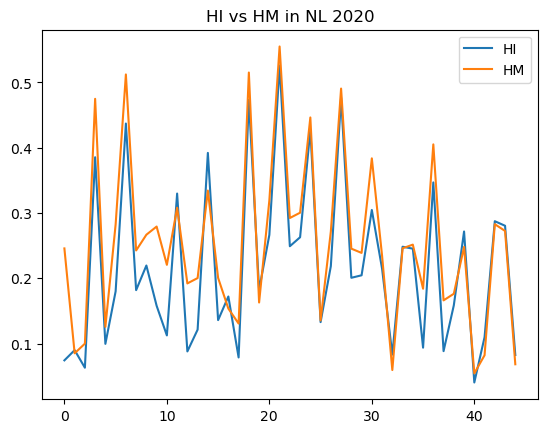

Mean for HI:  0.2176592020231874 Mean for HM:  0.2542873474499204
Median for HI:  0.20071949688248383 Median for HM:  0.24573744682276544
Wilcoxon Test (HI vs HM): Statistic = 145.0, p-value = 7.995253952230996e-06
------------- NL 2021 -------------------
Friedman Test: Chi-square statistic = 43.60000000000002, p-value = 3.407064022429848e-10
Significant differences found. Proceeding with pairwise comparisons.


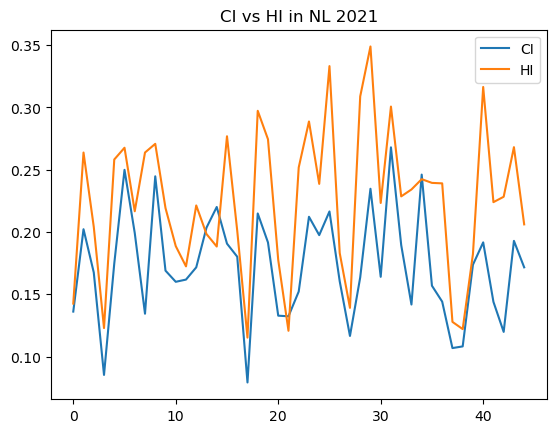

Mean for CI:  0.17274051006154129 Mean for HI:  0.22523250976244832
Median for CI:  0.1716077537058152 Median for HI:  0.22825079714082921
Wilcoxon Test (CI vs HI): Statistic = 25.0, p-value = 5.1386450650170445e-11


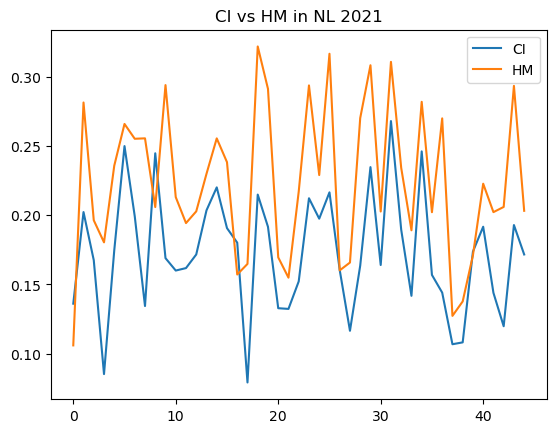

Mean for CI:  0.17274051006154129 Mean for HM:  0.22406251074128442
Median for CI:  0.1716077537058152 Median for HM:  0.21702581608704935
Wilcoxon Test (CI vs HM): Statistic = 39.0, p-value = 4.31100488640368e-10


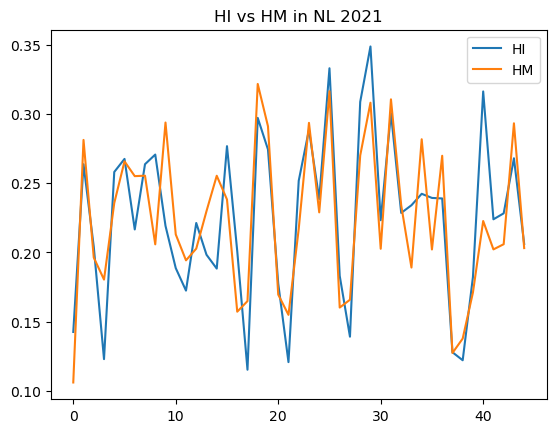

Mean for HI:  0.22523250976244832 Mean for HM:  0.22406251074128442
Median for HI:  0.22825079714082921 Median for HM:  0.21702581608704935
Wilcoxon Test (HI vs HM): Statistic = 498.0, p-value = 0.831822814353643
------------- Pacific -------------------
Friedman Test: Chi-square statistic = 28.31111111111113, p-value = 7.117382955331128e-07
Significant differences found. Proceeding with pairwise comparisons.


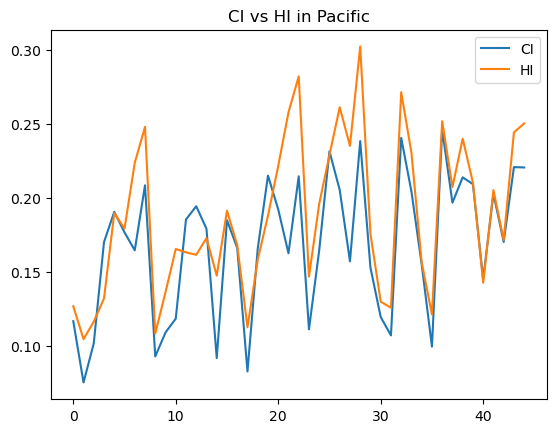

Mean for CI:  0.16799730049650644 Mean for HI:  0.1877371564042627
Median for CI:  0.1699525324709197 Median for HI:  0.1789770603809471
Wilcoxon Test (CI vs HI): Statistic = 156.0, p-value = 1.6303956613228365e-05


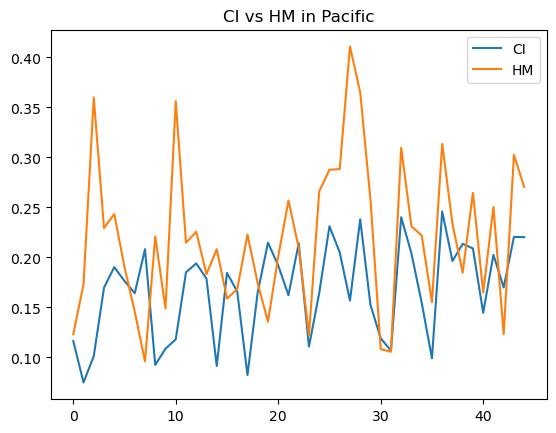

Mean for CI:  0.16799730049650644 Mean for HM:  0.219697206823611
Median for CI:  0.1699525324709197 Median for HM:  0.22099404752251342
Wilcoxon Test (CI vs HM): Statistic = 141.0, p-value = 6.1116223832868855e-06


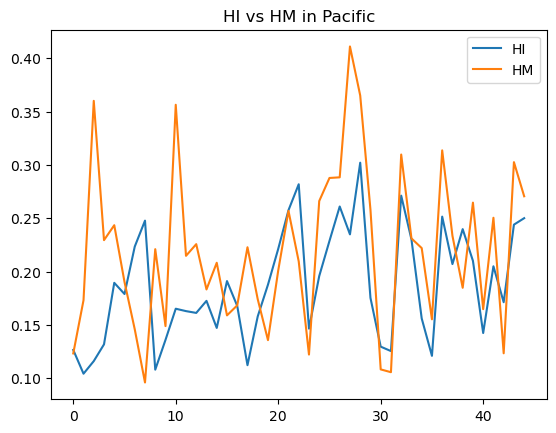

Mean for HI:  0.1877371564042627 Mean for HM:  0.219697206823611
Median for HI:  0.1789770603809471 Median for HM:  0.22099404752251342
Wilcoxon Test (HI vs HM): Statistic = 253.0, p-value = 0.0023253781589005484


In [76]:
friedman_and_posthoc(dissim_dict, 'Dissimilarity')

(45,)
[0.13895928 0.10771677 0.13347392 0.17024242 0.17694792 0.20453289
 0.17642709 0.18040334 0.1051731  0.11779419 0.10987866 0.20066385
 0.18831107 0.17198136 0.10079775 0.19949107 0.15733163 0.09705563
 0.20668174 0.23073013 0.2017906  0.18346251 0.23177694 0.12481723
 0.18212201 0.2209874  0.18780075 0.15181158 0.25183479 0.15402974
 0.12127239 0.13732293 0.22092557 0.19941213 0.16739536 0.11871298
 0.22267461 0.18603923 0.19690251 0.20127784 0.18193685 0.20485027
 0.18408658 0.20324017 0.21268831]


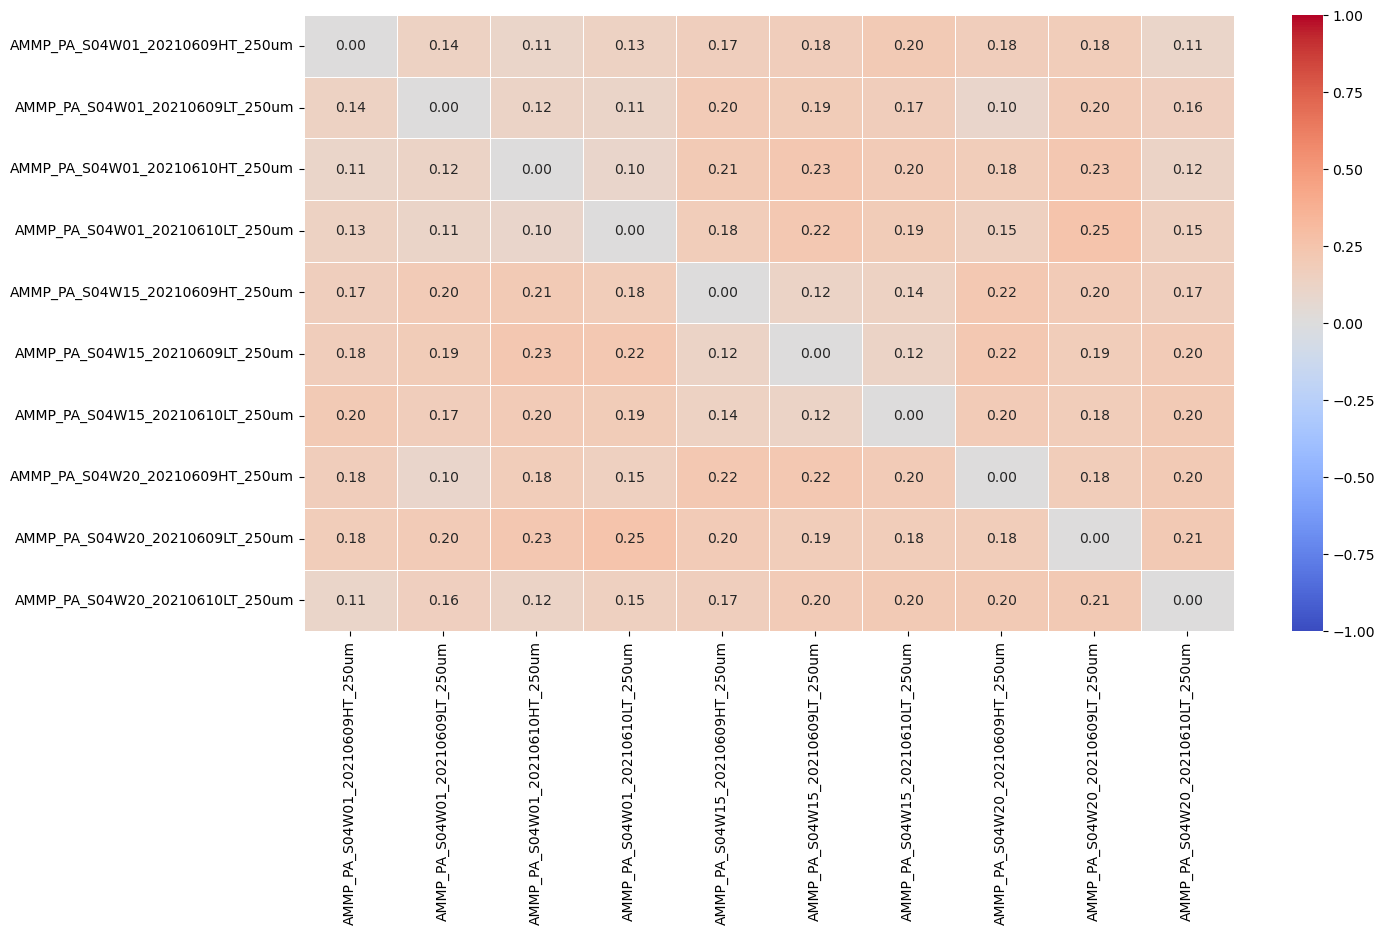

In [15]:


# Calculate the Bray-Curtis dissimilarity matrix
bray_curtis_dissimilarity = pdist(data, metric='braycurtis')
print(np.shape(bray_curtis_dissimilarity))
print(bray_curtis_dissimilarity)
# Convert to squareform to get the matrix form
dissimilarity_matrix = squareform(bray_curtis_dissimilarity)

# Display the dissimilarity matrix
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=data.index, columns=data.index)
# print(dissimilarity_df)

plt.figure(figsize=(15, 8))  # Optional: Adjust size of the plot
sns.heatmap(dissimilarity_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Show the plot
plt.show()
plt.close()

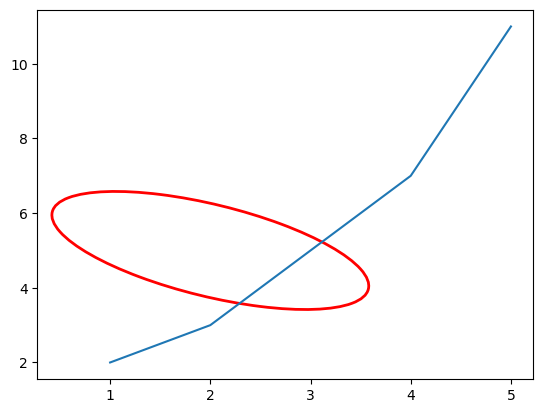

In [80]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axis
fig, ax = plt.subplots()

# Data to plot
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Plot the data
ax.plot(x, y)

# Create an ellipse: center (x=2, y=5), width=2, height=4, angle=45 degrees
ellipse = patches.Ellipse(xy=(2, 5), width=2, height=4, angle=45, edgecolor='red', facecolor='none', lw=2)

# Add the ellipse to the plot
ax.add_patch(ellipse)

# Show the plot
plt.show()


        NMDS1     NMDS2 type                        FlowCamID regionYear
0   -0.400747 -0.060318   CI      21_10_05_NL_S1_Z17_0752_250    NL 2021
1   -0.403923 -0.092932   HI      21_10_05_NL_S1_Z17_0752_250    NL 2021
2   -0.380804 -0.085279   HM      21_10_05_NL_S1_Z17_0752_250    NL 2021
3   -0.280679 -0.115318   CI      21_10_05_NL_S1_Z17_1406_250    NL 2021
4   -0.354397 -0.072826   HI      21_10_05_NL_S1_Z17_1406_250    NL 2021
..        ...       ...  ...                              ...        ...
115  0.577331  0.704147   HI  AMMP_PA_S04W20_20210609LT_250um    Pacific
116  0.534846  0.741902   HM  AMMP_PA_S04W20_20210609LT_250um    Pacific
117  0.505039  0.578968   CI  AMMP_PA_S04W20_20210610LT_250um    Pacific
118  0.460444  0.474905   HI  AMMP_PA_S04W20_20210610LT_250um    Pacific
119  0.483252  0.534061   HM  AMMP_PA_S04W20_20210610LT_250um    Pacific

[120 rows x 5 columns]


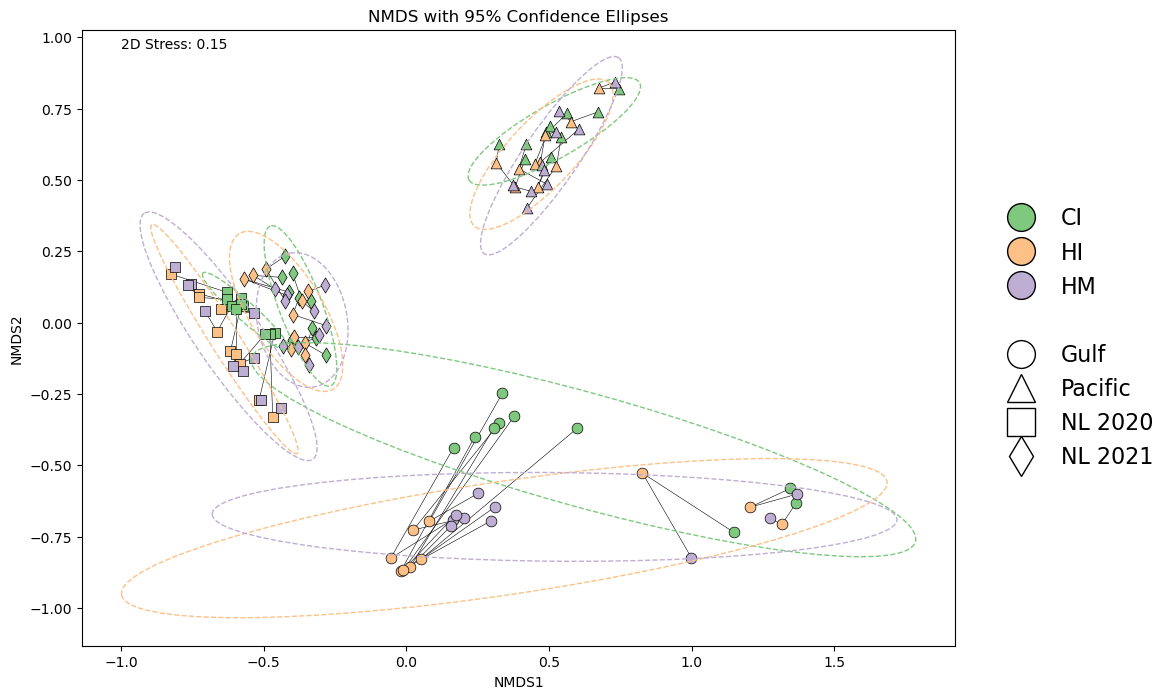

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from scipy.stats import chi2
from matplotlib.patches import Ellipse

# Example: Let's assume you already have an NMDS result in `df`
# Assume df has the NMDS coordinates (NMDS1, NMDS2) and the grouping variables ('type', 'regionYear')


coords_data = pd.read_excel('nmds_coords.xlsx')
print(coords_data)
# Example DataFrame (replace with your actual data)
data = {
    'NMDS1': np.random.randn(100),
    'NMDS2': np.random.randn(100),
    'type': np.random.choice(['CI', 'HI', 'HM'], 100),
    'regionYear': np.random.choice(['Region1_2020', 'Region2_2021'], 100)
}
df = pd.DataFrame(data)

# Function to calculate and plot the confidence ellipse for each group
def plot_confidence_ellipses(df, confidence_level=0.95):
    # Set up the figure
    plt.figure(figsize=(15, 8))
    marker_dict = {'Gulf': 'o', 'Pacific': '^', 'NL 2020': 's', 'NL 2021': 'd'}
    # ['#75ba75', '#fec76f', '#be95be']
    color_dict = {'CI': '#7fc97f', 'HI': '#fdc086', 'HM': '#beaed4'}
    markers = []
    for i, row in df.iterrows():
        markers.append(marker_dict[row['regionYear']])
    
    # Get unique combinations of type and regionYear
    group_cols = ['regionYear','type']

    lastSample = ''
    for group, group_data in df.groupby(['FlowCamID', 'type']):
        sample = group[0]
        coords = group_data[['NMDS1', 'NMDS2']].values
        # print(coords)
        addLine = True
        if sample != lastSample:
            addLine = False
        lastSample = group[0]
        # print(addLine)
        if addLine:
            line = Line2D([coords[0][0], last_coords[0][0]], [coords[0][1], last_coords[0][1]], color='black', linewidth=.4, linestyle='-', zorder=1, label="Line Segment")
            plt.gca().add_line(line)
        last_coords = group_data[['NMDS1', 'NMDS2']].values
    
    for group, group_data in df.groupby(group_cols):

        # Get the NMDS coordinates for the group
        coords = group_data[['NMDS1', 'NMDS2']].values

        # Calculate the covariance matrix
        cov_matrix = np.cov(coords.T)
        
        # Calculate the eigenvalues and eigenvectors of the covariance matrix
        eigvals, eigvecs = np.linalg.eigh(cov_matrix)
        
        # For a 95% confidence ellipse, use chi-squared value for 2D
        chi_square_val = chi2.ppf(confidence_level, df=2)
        
        # Calculate the axes of the ellipse (major and minor)
        axis_length = np.sqrt(eigvals * chi_square_val)
        width, height = axis_length
        
        # Calculate the angle of rotation of the ellipse
        angle = np.arctan2(eigvecs[1, 0], eigvecs[0, 0]) * 180 / np.pi
        
        # Ellipse properties
        ellipse = Ellipse(xy=np.mean(coords, axis=0), width=2*width, height=2*height,
                          angle=angle, facecolor='none', edgecolor=color_dict[group[1]], alpha=1, zorder=3, linestyle='--')
        
        # Plot the points and the ellipse
        plt.scatter(coords[:, 0], coords[:, 1], marker=marker_dict[group[0]], edgecolor='black', linewidths = .5, s=60, color=color_dict[group[1]], zorder=2, label=f"{group[0]} - {group[1]}")
        plt.gca().add_patch(ellipse)


    plt.title("NMDS with 95% Confidence Ellipses")
    plt.xlabel("NMDS1")
    plt.ylabel("NMDS2")
    # plt.legend()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.text(-1, 1, '2D Stress: 0.15', horizontalalignment='left', verticalalignment='top')
    legend_handles = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict['CI'], markersize=20, markeredgecolor='black', label='CI'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict['HI'], markersize=20, markeredgecolor='black', label='HI'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict['HM'], markersize=20, markeredgecolor='black', label='HM'),
        Line2D([0], [0], color='w', label=''),  # Blank line
        Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=20, markeredgecolor='black', label='Gulf'),
        Line2D([0], [0], marker='^', color='w', markerfacecolor='white', markersize=20, markeredgecolor='black', label='Pacific'),
        Line2D([0], [0], marker='s', color='w', markerfacecolor='white', markersize=20, markeredgecolor='black', label='NL 2020'),
        Line2D([0], [0], marker='d', color='w', markerfacecolor='white', markersize=20, markeredgecolor='black', label='NL 2021'),
    ]
    
    # Add the custom legend
    plt.legend(handles=legend_handles, loc='right', bbox_to_anchor=(1.25, 0.5), fontsize=16, frameon=False)
    # plt.grid(True)
    plt.show()

# Call the function
plot_confidence_ellipses(coords_data)


       NMDS1     NMDS2 type                              FlowCamID
0  -1.136057 -0.149567   CI  AMMP_Gulf_StPeters_1_20200903HT_250UM
1  -1.243991 -0.187935   HI  AMMP_Gulf_StPeters_1_20200903HT_250UM
2  -1.309070 -0.065459   HM  AMMP_Gulf_StPeters_1_20200903HT_250UM
3   0.174836 -0.007327   CI  AMMP_Gulf_StPeters_1_20200903LT_250UM
4   0.566059 -0.124386   HI  AMMP_Gulf_StPeters_1_20200903LT_250UM
5   0.466542  0.334673   HM  AMMP_Gulf_StPeters_1_20200903LT_250UM
6  -1.179188 -0.087531   CI  AMMP_Gulf_StPeters_1_20200904HT_250UM
7  -1.257961 -0.092353   HI  AMMP_Gulf_StPeters_1_20200904HT_250UM
8  -1.103693  0.292658   HM  AMMP_Gulf_StPeters_1_20200904HT_250UM
9   0.326993 -0.289929   CI   AMMP_Gulf_StPeters_2B_20200903_250UM
10  0.607000 -0.426026   HI   AMMP_Gulf_StPeters_2B_20200903_250UM
11  0.498262  0.588738   HM   AMMP_Gulf_StPeters_2B_20200903_250UM
12  0.162287 -0.091405   CI  AMMP_Gulf_StPeters_2_20200903HT_250UM
13  0.585752 -0.232581   HI  AMMP_Gulf_StPeters_2_20200903HT_2

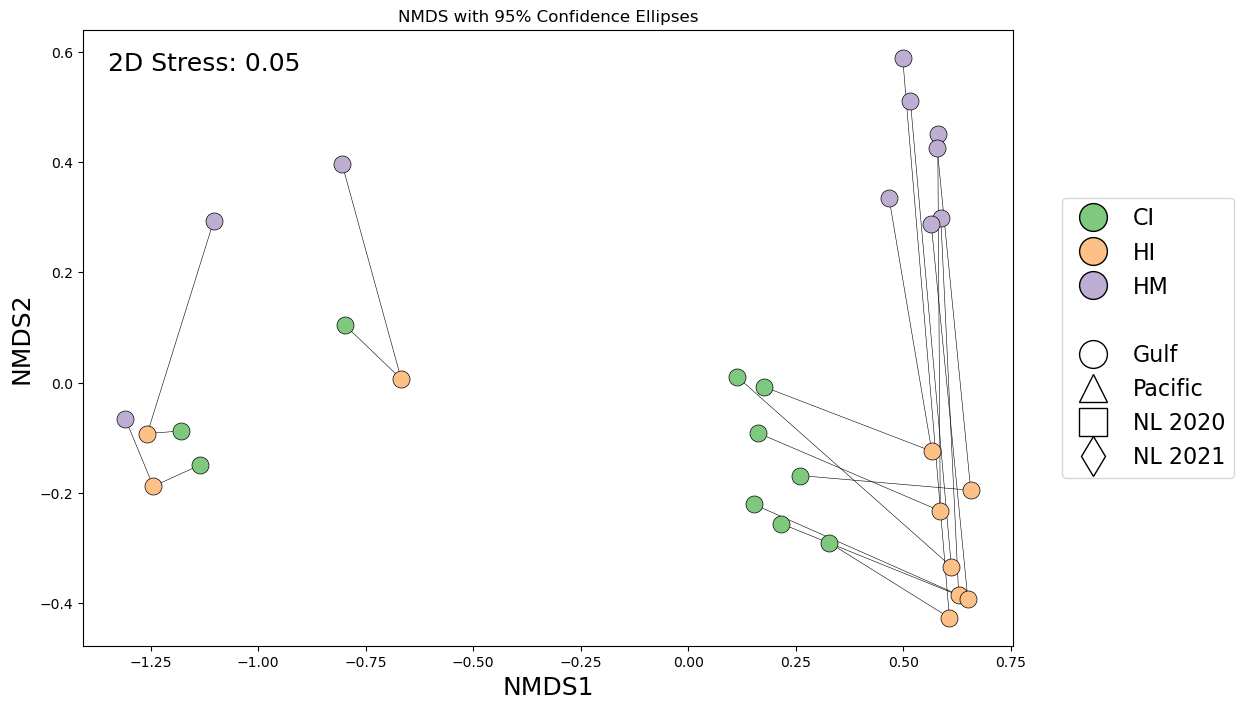

In [79]:
coords_data = pd.read_excel('Gulf_max_nmds_coords.xlsx')
print(coords_data)
# Example DataFrame (replace with your actual data)

# Function to calculate and plot the confidence ellipse for each group
def plot_confidence_ellipses(df, regionYear, confidence_level=0.95):
    # Set up the figure
    plt.figure(figsize=(12, 8))
    marker_dict = {'Gulf': 'o', 'Pacific': '^', 'NL 2020': 's', 'NL 2021': 'd'}
    # ['#75ba75', '#fec76f', '#be95be']
    color_dict = {'CI': '#7fc97f', 'HI': '#fdc086', 'HM': '#beaed4'}
    markers = []
 
    # Get unique combinations of type and regionYear
    group_cols = ['type']

    lastSample = ''
    for group, group_data in df.groupby(['FlowCamID', 'type']):
        sample = group[0]
        coords = group_data[['NMDS1', 'NMDS2']].values
        # print(coords)
        addLine = True
        if sample != lastSample:
            addLine = False
        lastSample = group[0]
        # print(addLine)
        if addLine:
            line = Line2D([coords[0][0], last_coords[0][0]], [coords[0][1], last_coords[0][1]], color='black', linewidth=.4, linestyle='-', zorder=1, label="Line Segment")
            plt.gca().add_line(line)
        last_coords = group_data[['NMDS1', 'NMDS2']].values
    
    for group, group_data in df.groupby(group_cols):

        # Get the NMDS coordinates for the group
        coords = group_data[['NMDS1', 'NMDS2']].values

        # Calculate the covariance matrix
        cov_matrix = np.cov(coords.T)
        
        # Calculate the eigenvalues and eigenvectors of the covariance matrix
        eigvals, eigvecs = np.linalg.eigh(cov_matrix)
        
        # For a 95% confidence ellipse, use chi-squared value for 2D
        chi_square_val = chi2.ppf(confidence_level, df=2)
        
        # Calculate the axes of the ellipse (major and minor)
        axis_length = np.sqrt(eigvals * chi_square_val)
        width, height = axis_length
        
        # Calculate the angle of rotation of the ellipse
        angle = np.arctan2(eigvecs[1, 0], eigvecs[0, 0]) * 180 / np.pi
        
        # # Ellipse properties
        # ellipse = Ellipse(xy=np.mean(coords, axis=0), width=2*width, height=2*height,
        #                   angle=angle, facecolor='none', edgecolor=color_dict[group[1]], alpha=1, zorder=3, linestyle='--')
        
        # Plot the points and the ellipse
        plt.scatter(coords[:, 0], coords[:, 1], marker=marker_dict[regionYear], edgecolor='black', linewidths = .5, s=150, color=color_dict[group[0]], zorder=2)
        # plt.gca().add_patch(ellipse)


    plt.title("NMDS with 95% Confidence Ellipses")
    plt.xlabel("NMDS1", fontsize=18)
    plt.ylabel("NMDS2", fontsize=18)
    # plt.legend()
    # plt.gca().set_aspect('equal', adjustable='box')
    plt.text(-1.35, 0.6, '2D Stress: 0.05', horizontalalignment='left', verticalalignment='top', fontsize=18)
    legend_handles = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict['CI'], markersize=20, markeredgecolor='black', label='CI'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict['HI'], markersize=20, markeredgecolor='black', label='HI'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict['HM'], markersize=20, markeredgecolor='black', label='HM'),
        Line2D([0], [0], color='w', label=''),  # Blank line
        Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=20, markeredgecolor='black', label='Gulf'),
        Line2D([0], [0], marker='^', color='w', markerfacecolor='white', markersize=20, markeredgecolor='black', label='Pacific'),
        Line2D([0], [0], marker='s', color='w', markerfacecolor='white', markersize=20, markeredgecolor='black', label='NL 2020'),
        Line2D([0], [0], marker='d', color='w', markerfacecolor='white', markersize=20, markeredgecolor='black', label='NL 2021'),
    ]
    
    # Add the custom legend
    plt.legend(handles=legend_handles, loc='right', bbox_to_anchor=(1.25, 0.5), fontsize=16)
    # plt.grid(True)
    plt.show()

plot_confidence_ellipses(coords_data, 'Gulf')

In [81]:
import pandas as pd

# Sample DataFrame
data = {'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'C', 'B']}
df = pd.DataFrame(data)

# Get unique counts for the 'Category' column
unique_counts = df['Category'].value_counts()

# Display the unique counts
print(unique_counts)


Category
A    3
B    3
C    3
Name: count, dtype: int64


3